<a href="https://colab.research.google.com/github/yazim1/Data-Science-and-Analytics-final-year-project/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is a python notebook which contains the code for the linear regregression model

#importing the libraries

In [15]:
#This code imports all the relevant libraries needed for the regression
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#importing the dataset

In [16]:
#Now we import the dataset from yahoo finance with the code below
#importing the dataset for gold from yahoo finance 'GC=F' is the ticker symbol. importing beween the dates 1st jan 2012 and 3rd jan 2021 so around 9 years worth of data
df = yf.download('GC=F', start='2012-01-01', end='2021-01-03')
#showing the dataset for gold and saving it in a variable called df
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1568.900024,1604.300049,1566.000000,1599.699951,1599.699951,229
2012-01-04,1596.599976,1618.599976,1594.500000,1611.900024,1611.900024,172
2012-01-05,1610.800049,1624.099976,1597.800049,1619.400024,1619.400024,362
2012-01-06,1622.500000,1627.800049,1616.099976,1616.099976,1616.099976,20
2012-01-09,1614.300049,1620.099976,1607.500000,1607.500000,1607.500000,8
...,...,...,...,...,...,...
2020-12-24,1877.300049,1879.900024,1875.699951,1879.900024,1879.900024,46
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,1877.199951,75
2020-12-29,1881.300049,1881.300049,1879.699951,1879.699951,1879.699951,343


In [17]:
df.index = pd.to_datetime(df.index)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

In [18]:
x = df[['Open', 'High', 'Low', 'Volume']]  #features
y = df['Close']  #target variable


#spliting data

In [19]:
#spliiting data temporally into 80/20 percent split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)


#Creating model

In [20]:
#initialising regression model
regressor = LinearRegression()

#Training the model

In [21]:
#training/fitting the model
model = regressor.fit(x_train,y_train)

#Linear regression equation y-intercept and coefficients

In [22]:
#coeffcicnts for the multiple regression equation
print(regressor.coef_)

[-5.68918852e-01  8.03107382e-01  7.67759974e-01 -2.85793499e-06]


In [23]:
#y-intercept for the regression equation
print(regressor.intercept_)

-2.5751453617876905


#predicting the values

In [24]:
#calculating the predicted values
predicted =regressor.predict(x_test)
predicted

array([1305.25904541, 1300.50570544, 1306.06977205, 1311.58048882,
       1322.46503651, 1314.59024825, 1309.28773904, 1294.39904457,
       1293.99452183, 1290.34936255, 1288.54203353, 1289.71164708,
       1283.62289923, 1285.49260278, 1299.786237  , 1303.59480899,
       1306.14194413, 1292.92383869, 1290.11869207, 1284.8152161 ,
       1275.14630652, 1271.94663232, 1272.41213969, 1273.40585514,
       1268.71533858, 1273.5362875 , 1276.99530233, 1284.82621489,
       1278.89520207, 1282.21601951, 1282.31053089, 1268.38656077,
       1277.30784058, 1280.66447505, 1282.82921407, 1279.31778161,
       1283.63889121, 1284.60059109, 1293.63149618, 1295.3735248 ,
       1296.16073482, 1285.13618106, 1275.69625782, 1276.01125975,
       1271.9033525 , 1273.50644565, 1284.72834228, 1282.92476033,
       1276.41212077, 1279.97795206, 1282.08396733, 1302.49050524,
       1323.67390229, 1325.07058813, 1338.48107796, 1333.6302124 ,
       1342.31349226, 1327.40623811, 1321.27249293, 1333.01354

In [25]:
newdf =pd.DataFrame({'Actual':y_test,'Predicted': predicted})
newdf


,Actual,Predicted
1809,1305.000000,1305.259045
1810,1300.500000,1300.505705
1811,1306.099976,1306.069772
1812,1311.599976,1311.580489
1813,1321.900024,1322.465037
...,...,...
2257,1879.900024,1879.242268
2258,1877.199951,1880.121797
2259,1879.699951,1881.161154
2260,1891.000000,1891.759874


from matplotlib import pyplot as plt
newdf['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
newdf['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
newdf.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
newdf['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
newdf['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

#Evaluating the model

In [26]:
r_squared = r2_score(y_test, predicted)
print(f"R-squared: {r_squared}")
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, predicted)
print(f"MAE: {mae}")

R-squared: 0.9992032699379007
MSE: 36.47274666414068
RMSE: 6.039267063488804
MAE: 3.93731265270131


#Plotting actual vs predicted

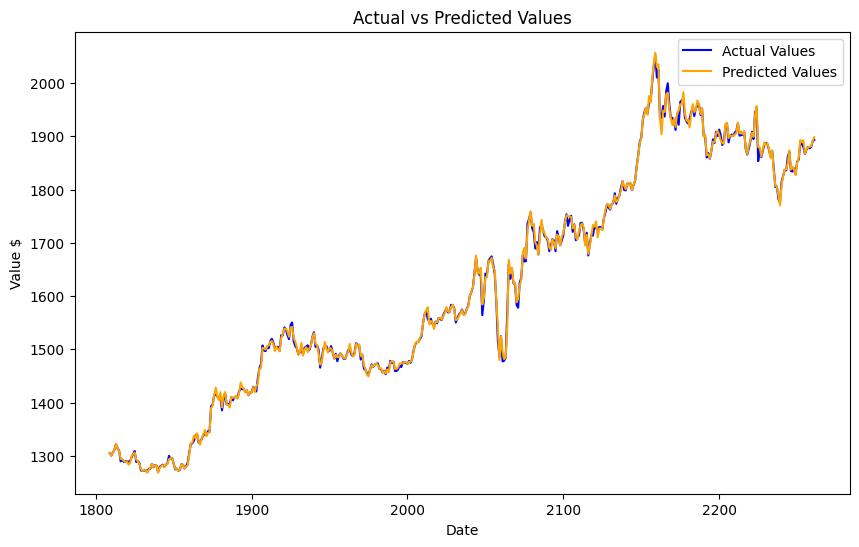

In [27]:
plt.figure(figsize=(10, 6))  # Set the size of the plot

plt.plot(newdf['Actual'], label='Actual Values', color='blue')  #Plotting the actual values
plt.plot(newdf['Predicted'], label='Predicted Values', color='orange')  #Plotting the predicted values

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value $')

plt.legend()  #adding a legend to distinguish actual and predicted values
plt.show()


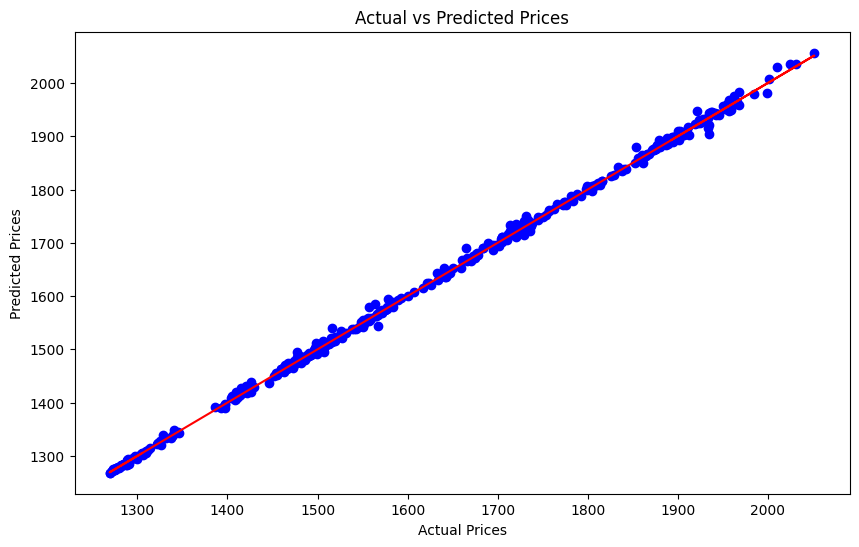

In [28]:
#plotting actual vs predicted
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(y_test, predicted, color='blue')  # Scatter plot of actual and predicted values
plt.plot(y_test, y_test, color='red')  # A reference line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
